Load a pre-trained model and tokenizer from Hugging Face



In [ ]:
from transformers import AutoModelForQuestionAnswering, AutoTokenizer
import torch

# Load the pre-trained model and tokenizer
model_name = "distilbert-base-uncased-distilled-squad"
model = AutoModelForQuestionAnswering.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

question-answering function

In [ ]:
def answer_question(question, context):
    inputs = tokenizer(question, context, truncation=True, padding=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
    answer_start_scores = outputs.start_logits
    answer_end_scores = outputs.end_logits
    answer_start = torch.argmax(answer_start_scores)
    answer_end = torch.argmax(answer_end_scores) + 1
    answer = tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(inputs['input_ids'][0][answer_start:answer_end]))
    return answer if answer else "No answer found"

context and Qstn

In [ ]:
context = """
Machine learning (ML) is a type of artificial intelligence (AI) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so.
Its algorithms use historical data as input to predict new output values.
"""

questions = [
    "What is machine learning?",
    "How does machine learning work?",
    "What type of data does machine learning use?"
]

In [ ]:
for question in questions:
    answer = answer_question(question, context)
    print(f"Question: {question}")
    print(f"Answer: {answer}\n")

Question: What is machine learning?
Answer: a type of artificial intelligence

Question: How does machine learning work?
Answer: allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so. its algorithms use historical data as input to predict new output values

Question: What type of data does machine learning use?
Answer: historical data



Original prompt

In [ ]:
original_prompt = "What is machine learning?"
print("Original Prompt Response:")
print(answer_question(original_prompt, context))

Original Prompt Response:
a type of artificial intelligence


Optimized prompt with more context

In [ ]:
optimized_prompt = "Can you explain what machine learning is in simple terms for a beginner?"
print("\nOptimized Prompt Response:")
print(answer_question(optimized_prompt, context))


Optimized Prompt Response:
No answer found


optimized prompt is too complex making the model difficult to undertsand
This can be due to the optimized prompt being too complex or the model not understanding the more specific request.
Simplify the optimized prompt to make it more understandable.
Let's simplify the optimized prompt to ensure it remains effective while being less complex.

In [ ]:
optimized_prompt = "Explain machine learning simply."
print("\nOptimized Prompt Response:")
print(answer_question(optimized_prompt, context))


Optimized Prompt Response:
machine learning ( ml ) is a type of artificial intelligence ( ai ) that allows software applications to become more accurate at predicting outcomes without being explicitly programmed to do so. its algorithms use historical data as input to predict new output values


By simplifying the optimized prompt, the model might find it easier to identify relevant spans in the context. This approach ensures that the prompt remains effective while reducing complexity.

# Responses from Chatgpt and gemini

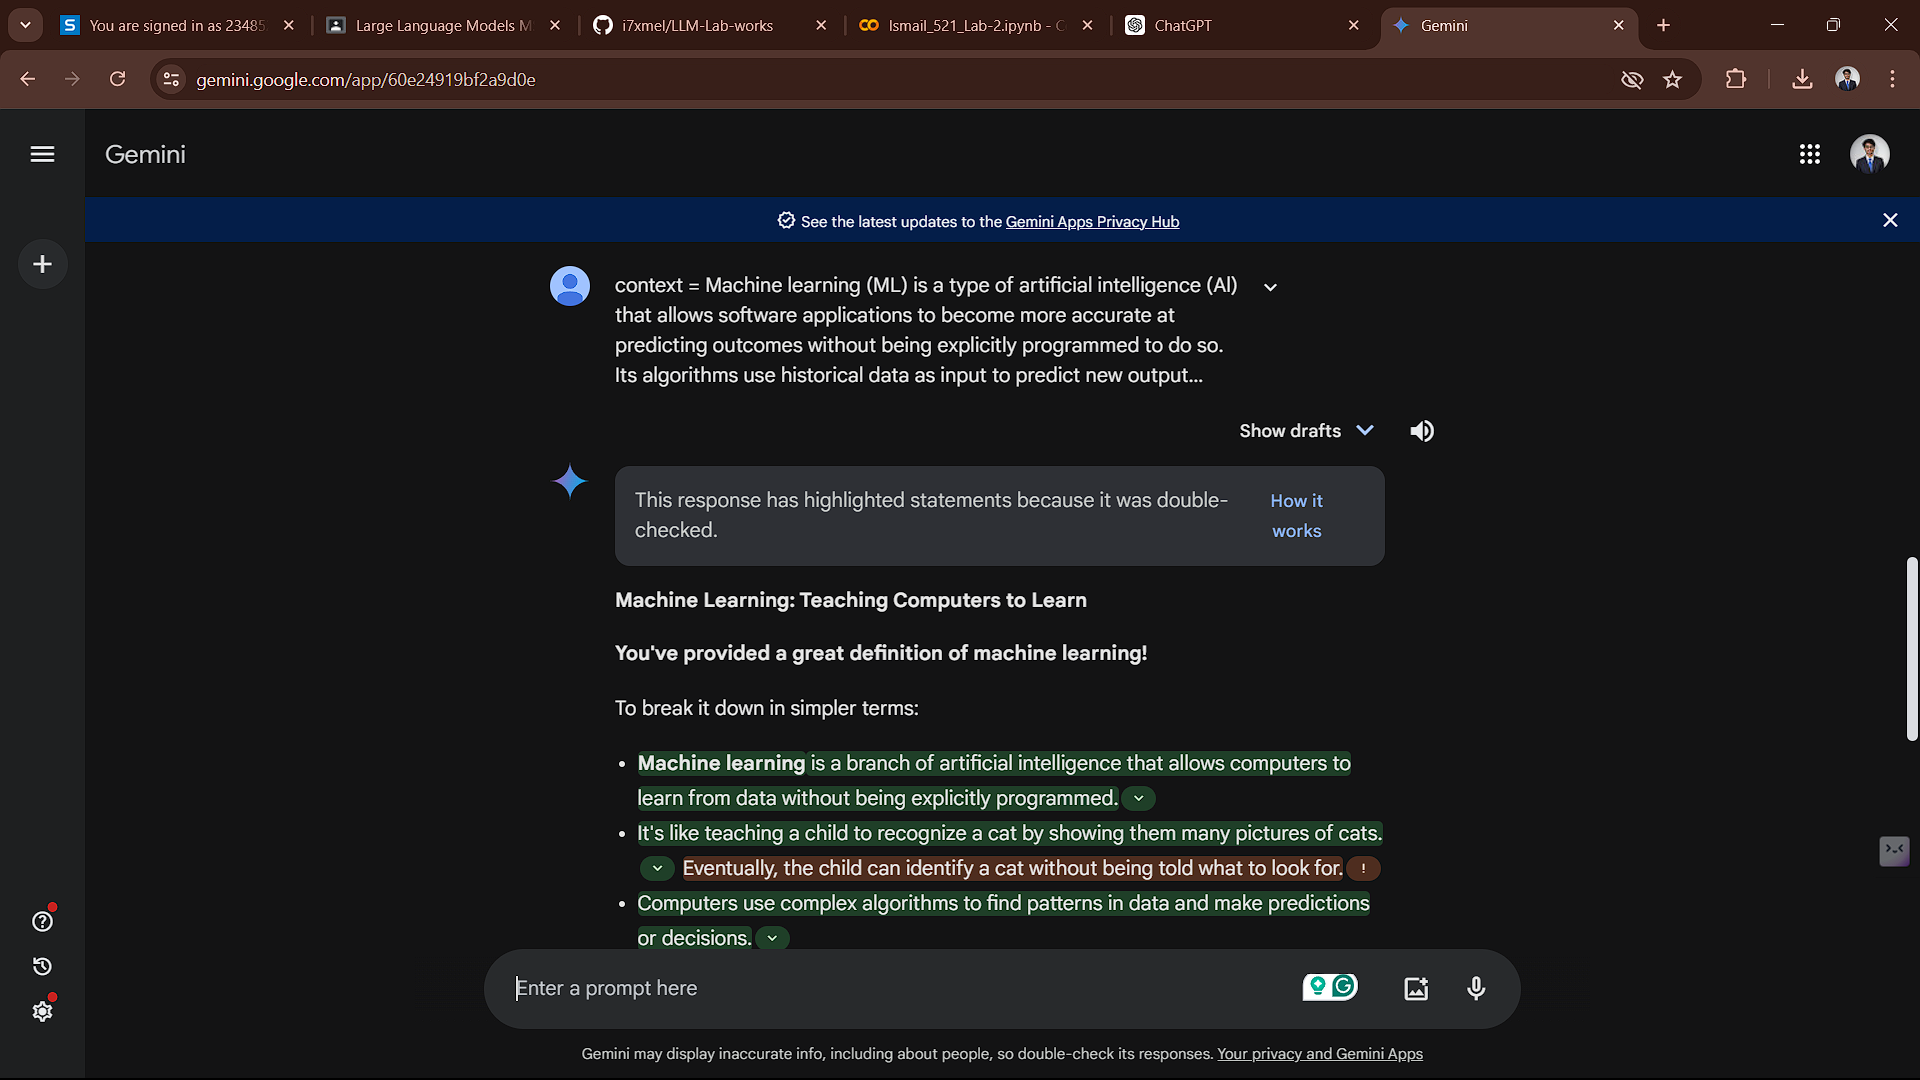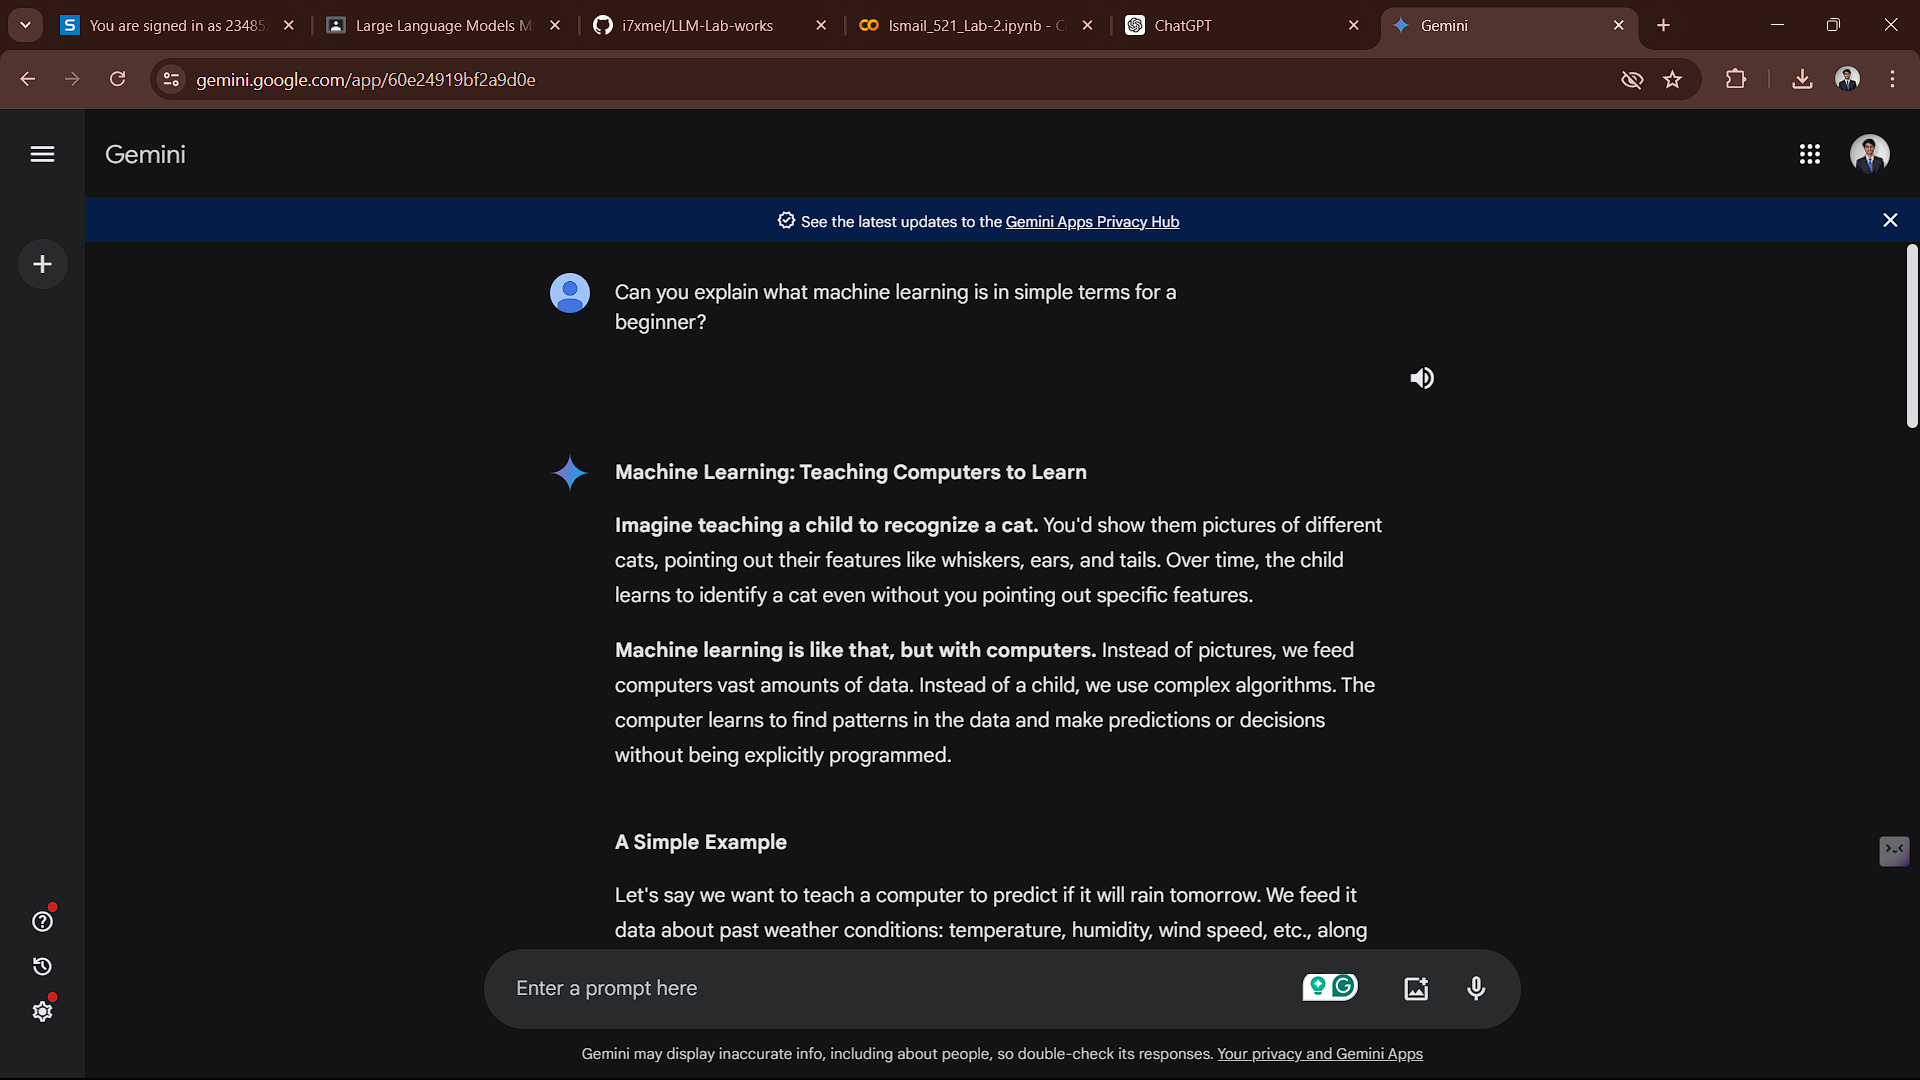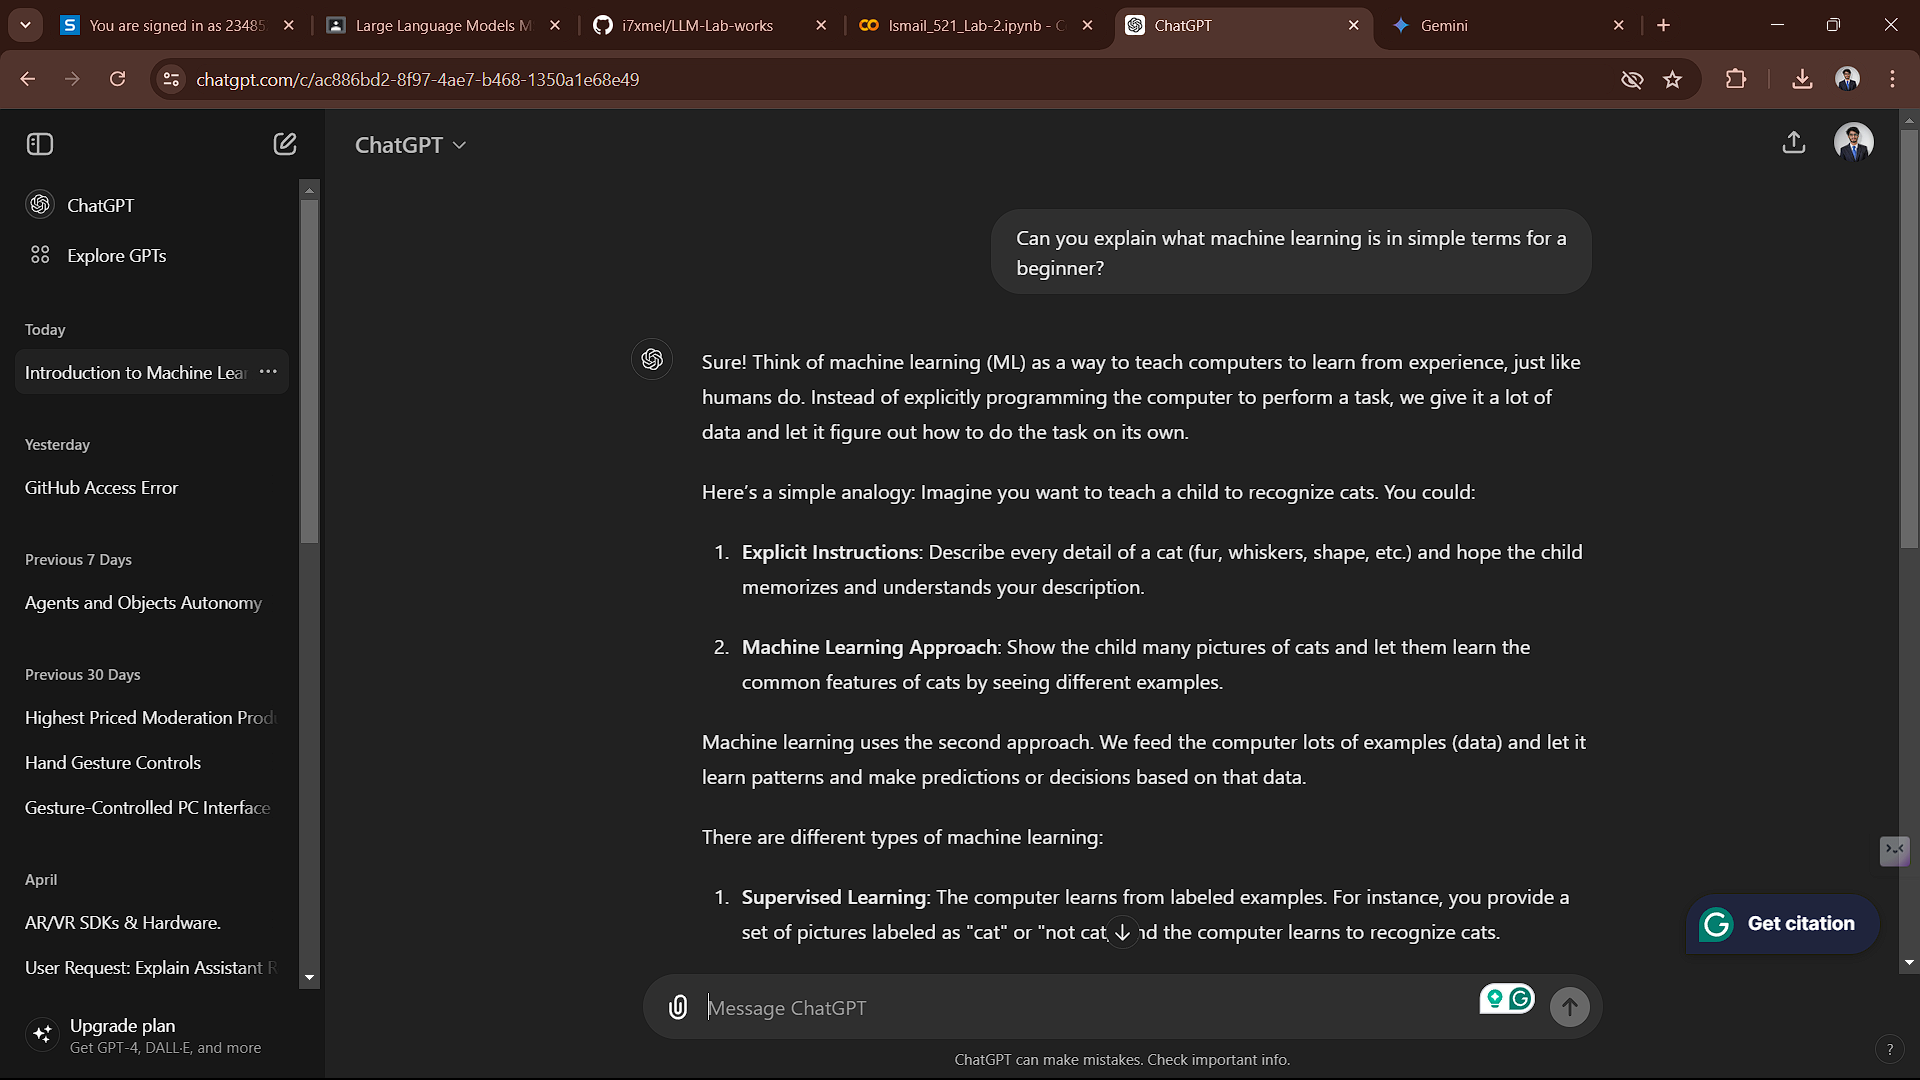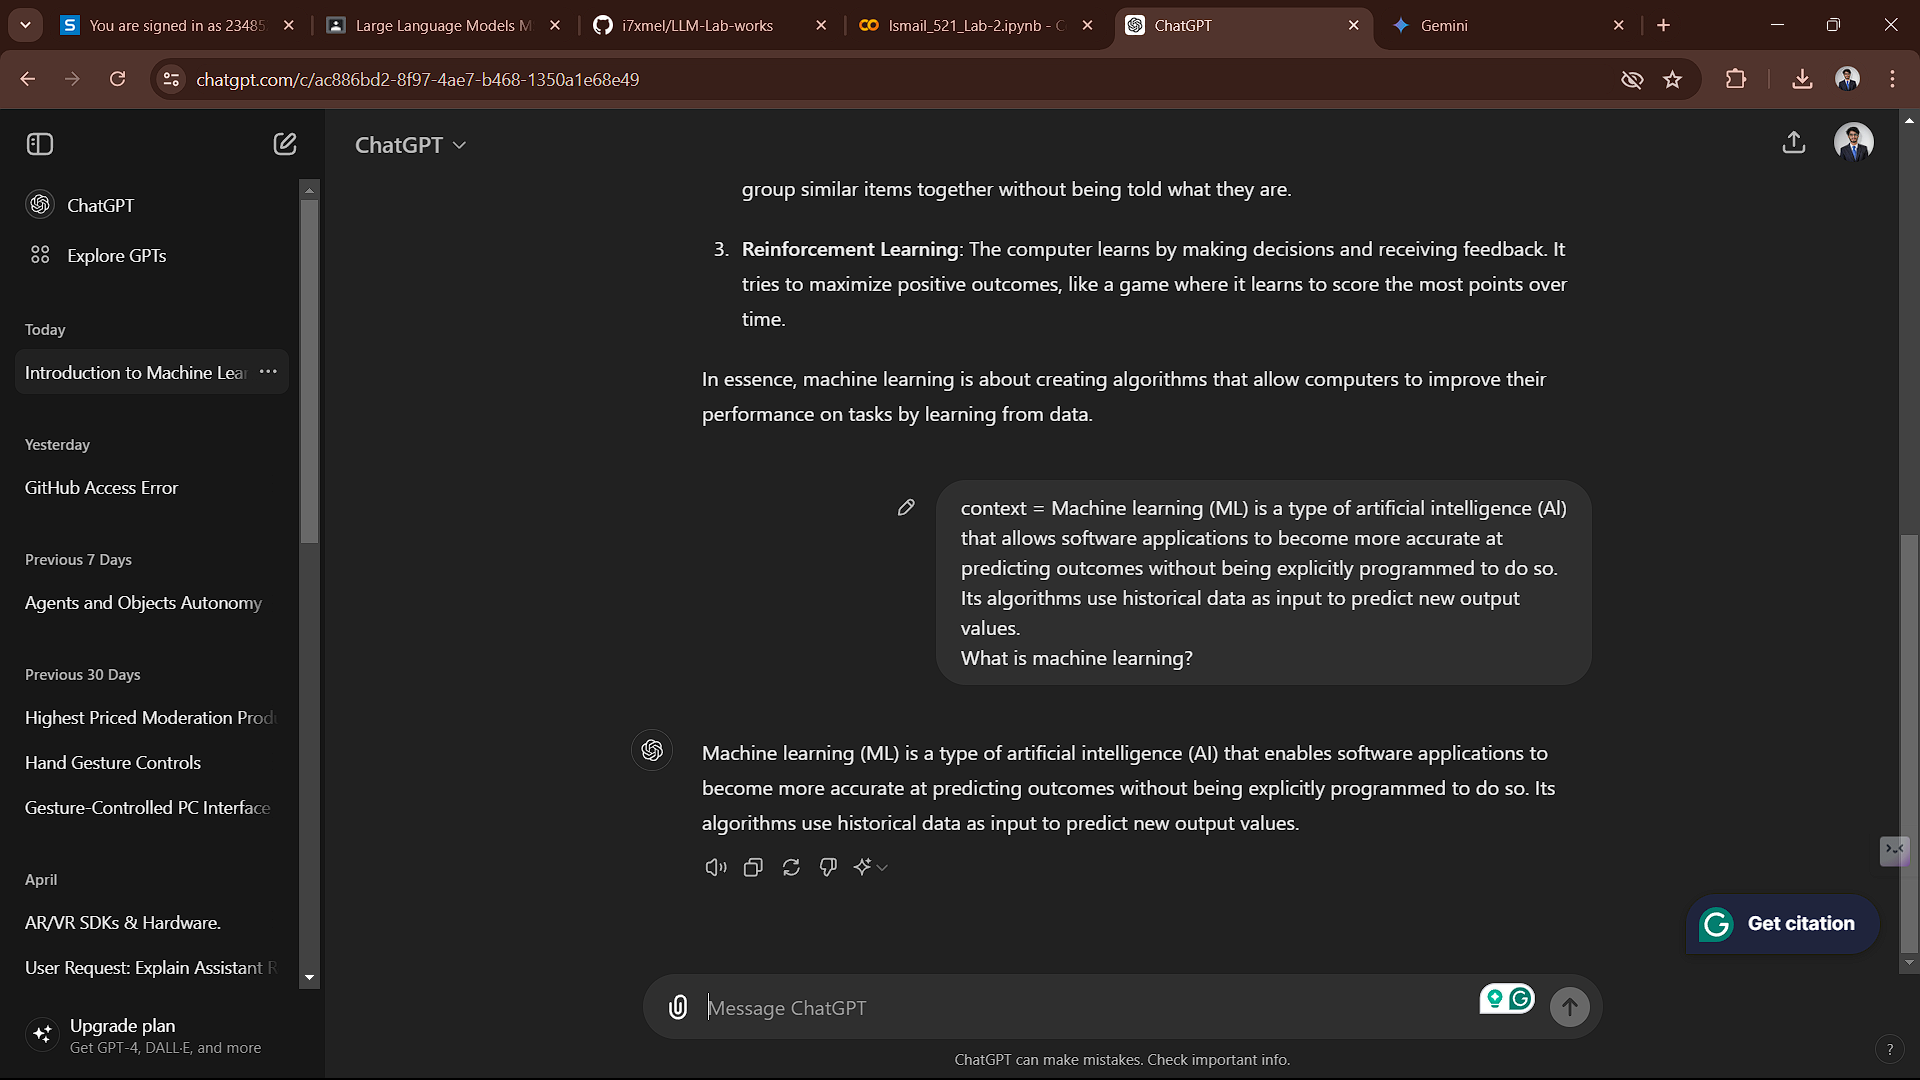

Responses from these models are very clear and simplified using relatable anlogies and metaphors

ChatGPT and Gemini, Both models prioritize clarity and simplicity, using metaphors and analogies to explain complex concepts like machine learning.

Both models ensure accessibility by breaking down complex concepts into simpler terms, ensuring that beginners and non-technical users can grasp the fundamental concepts of machine learning.

Distilbert The response from a fine-tuned DistilBERT model would likely be more technically oriented, focusing on precise definitions and mechanisms without the use of creative analogies unless explicitly fine-tuned for such prompts.

